# A1 - Analyzing Collected Repositories
This notebook investigates in detail which of the repositories collected via GitHub's API in [s1_collect.py](../s1_collect.py) fit the corpus and which had to be filtered out.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from src.db.database import connect
from src.config.states import *

## Collecting
In GitHub we searched for repositories, from any time, with the following search texts:
"Data Science", "Ciência de Dados", "Science des Données" or "Ciencia de los Datos".

In [2]:
with connect() as session:
    repositories = pd.read_sql_table("repositories", session.connection())
    total = len(repositories)
    print("A total of {} repositories were retrieved ".format(total))

A total of 327016 repositories were retrieved 


## Filtering
After collecting all repositories, we then checked which of them fit the requirements:
- At least 1 language, 1 commit and 1 contributor
- Is not a course project

#### Repositories with No Commits

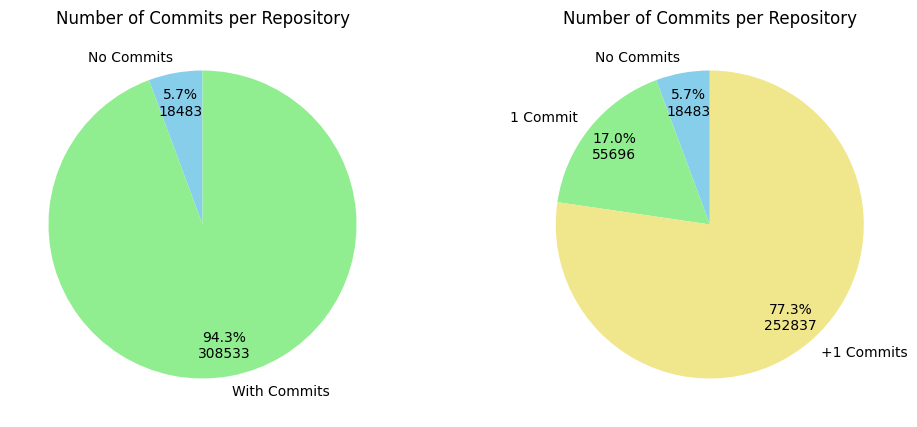

In [3]:
no_commits = repositories[(repositories.commits.isnull())]
one_commit = repositories[(repositories.commits == 1)]
more_one_commits = repositories[(repositories.commits > 1)]

data1 = [len(no_commits), len(one_commit) + len(more_one_commits)]
labels1 = ['No Commits', "With Commits"]
colors1 = ['skyblue', 'lightgreen']

fig1, ax1 = plt.subplots(figsize=(12,5), ncols=2)
ax1[0].pie(data1, labels=labels1, colors=colors1, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax1[0].set_title("Number of Commits per Repository")

data2 = [len(no_commits), len(one_commit) , len(more_one_commits)]
labels2 = ['No Commits', "1 Commit", "+1 Commits"]
colors2 = ['skyblue', 'lightgreen', 'khaki']

ax1[1].pie(data2, labels=labels2, colors=colors2, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax1[1].set_title("Number of Commits per Repository");


#### Repositories with No Contributors

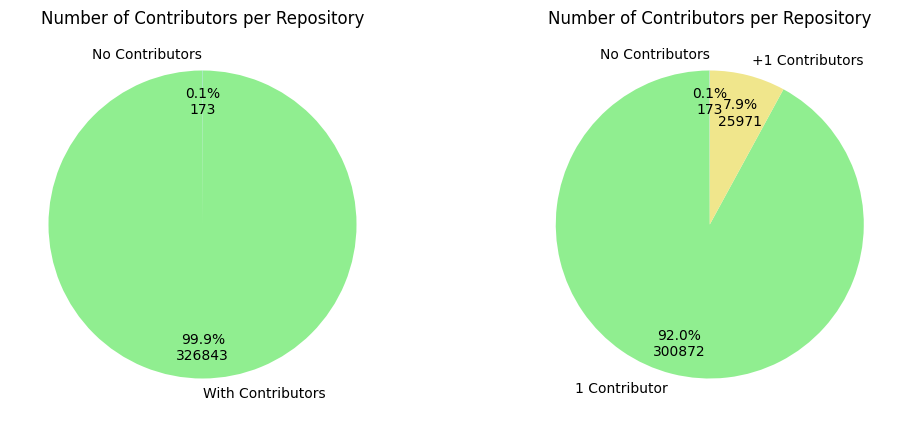

In [4]:
no_contributors = repositories[(repositories.contributors == 0)]
one_contributor = repositories[(repositories.contributors == 1)]
more_one_contributors = repositories[(repositories.contributors > 1)]

data3 = [len(no_contributors), len(one_contributor) + len(more_one_contributors)]
labels3 = ['No Contributors', "With Contributors"]
colors3 = ['skyblue', 'lightgreen']

fig2, ax2 = plt.subplots(figsize=(12,5), ncols=2)
ax2[0].pie(data3, labels=labels3, colors=colors3, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax2[0].set_title("Number of Contributors per Repository")

data4 = [len(no_contributors), len(one_contributor) , len(more_one_contributors)]
labels4 = ['No Contributors', "1 Contributor", "+1 Contributors"]
colors4 = ['skyblue', 'lightgreen', 'khaki']

def piechart_format(prct_value):
    if prct_value < 1:
        return '{:.1f}%\n{:.0f}'.format(prct_value, (len(repositories) * prct_value / 100))
    elif prct_value < 10:
        return '\n{:.1f}%\n{:.0f}'.format(prct_value, (len(repositories) * prct_value / 100))
    else:
        return '{:.1f}%\n{:.0f}'.format(prct_value, (len(repositories) * prct_value / 100))


ax2[1].pie(data4, labels=labels4, colors=colors4, pctdistance=0.8,
        autopct=piechart_format, startangle=90)
ax2[1].set_title("Number of Contributors per Repository");

#### Repositories with No Languages

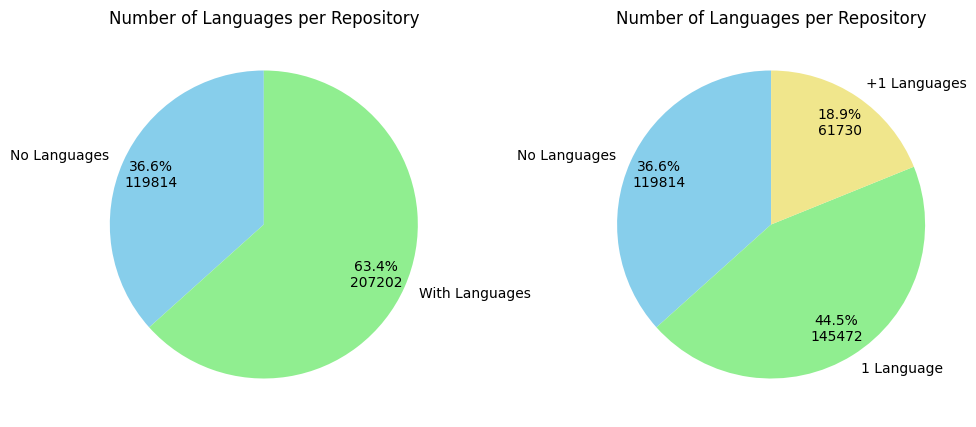

In [5]:
no_languages = repositories[(repositories.languages == 0)]
one_language = repositories[(repositories.languages == 1)]
more_one_languages = repositories[(repositories.languages > 1)]

data5 = [len(no_languages), len(one_language) + len(more_one_languages)]
labels5 = ['No Languages', "With Languages"]
colors5 = ['skyblue', 'lightgreen']

fig3, ax3 = plt.subplots(figsize=(12,5), ncols=2)
ax3[0].pie(data5, labels=labels5, colors=colors5, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax3[0].set_title("Number of Languages per Repository")

data6 = [len(no_languages), len(one_language) , len(more_one_languages)]
labels6 = ['No Languages', "1 Language", "+1 Languages"]
colors6 = ['skyblue', 'lightgreen', 'khaki']

ax3[1].pie(data6, labels=labels6, colors=colors6, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax3[1].set_title("Number of Languages per Repository");


#### Course Repositories

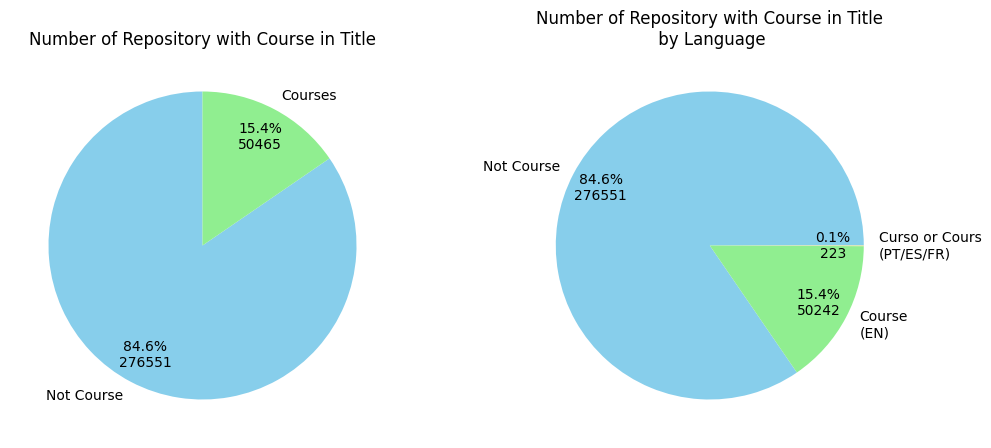

In [7]:
repositories[['user', 'name']] = repositories['repository'].str.split('/', expand=True)

en = repositories[repositories['name'].str.contains('course')]
pt_es = repositories[repositories['name'].str.contains('curso')]
fr = repositories[repositories['name'].str.contains(r'\bcours(?!e)\b')]
not_course = len(repositories) - len(en) - len(pt_es) - len(fr)

data5 = [not_course, len(en) + len(pt_es) + len(fr)]
labels5 = ['Not Course', "Courses"]
colors5 = ['skyblue', 'lightgreen']

fig4, ax4 = plt.subplots(figsize=(12,5), ncols=2)
ax4[0].pie(data5, labels=labels5, colors=colors5, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax4[0].set_title("Number of Repository with Course in Title")

data6 = [not_course, len(en), len(pt_es) + len(fr)]
labels6 = ["Not Course", "Course\n(EN)", "Curso or Cours\n(PT/ES/FR)"]
colors6 = ['skyblue', 'lightgreen', 'khaki']

ax4[1].pie(data6, labels=labels6, colors=colors6, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=0)
ax4[1].set_title("Number of Repository with Course in Title\n by Language");

## Filtered and Excluded Repositories

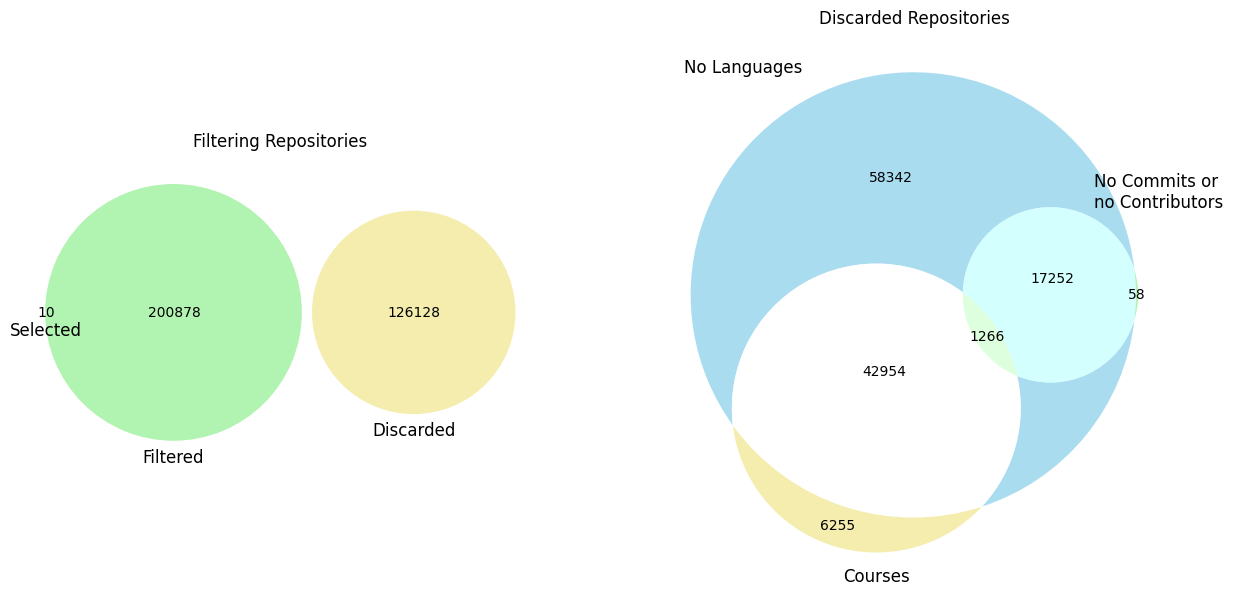

In [13]:
fig5, ax5 = plt.subplots(figsize=(15,10), ncols=2)

no_languages = repositories.loc[(repositories['languages'] == 0)]
no_commits_contrib = repositories.loc[(repositories['commits'].isnull()) | (repositories['contributors'] == 0)]
courses = repositories.loc[
    (repositories['name'].str.contains('course')) |
    (repositories['name'].str.contains('curso'))  |
    (repositories['name'].str.contains('cours'))
]
ok = repositories.loc[
    (repositories["languages"] > 0) &
    (repositories["contributors"] > 0) &
    (repositories['commits'].notnull()) &
    (~repositories['name'].str.contains('course')) &
    (~repositories['name'].str.contains('curso')) &
    (~repositories['name'].str.contains('cours'))
]

set1 = set(no_languages.index)
set2 = set(no_commits_contrib.index)
set3 = set(courses.index)

selected = ok[~ok.state.isin([REP_COLLECTED, REP_FILTERED, REP_DISCARDED])]
filtered = ok[ok.state==REP_FILTERED]

set_selected = set(selected.index)
set_filtered = set(filtered.index) | set_selected
set_discarded = set1 | set2 |set3


venn3([set_selected, set_filtered, set_discarded ], ax=ax5[0], set_colors=('skyblue', 'lightgreen', 'khaki'),
      set_labels=( 'Selected', 'Filtered','Discarded'), alpha=0.7)
ax5[0].set_title("Filtering Repositories")

venn3([set1, set2, set3], ax=ax5[1], set_colors=('skyblue', 'lightgreen', 'khaki', 'pink'),
      set_labels=('No Languages', 'No Commits or\nno Contributors', "Courses"), alpha=0.7)
ax5[1].set_title("Discarded Repositories");